In [2]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors

In [3]:
data = datasets.load_digits()

In [4]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
data.images.shape

(1797, 8, 8)

In [18]:
print(f"Il y a {len(data.target)} classe dans data.target = {data.target}")


Il y a 1797 classe dans data.target = [0 1 2 ... 8 9 8]


In [8]:
print(data.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [19]:
data.target[0]

0

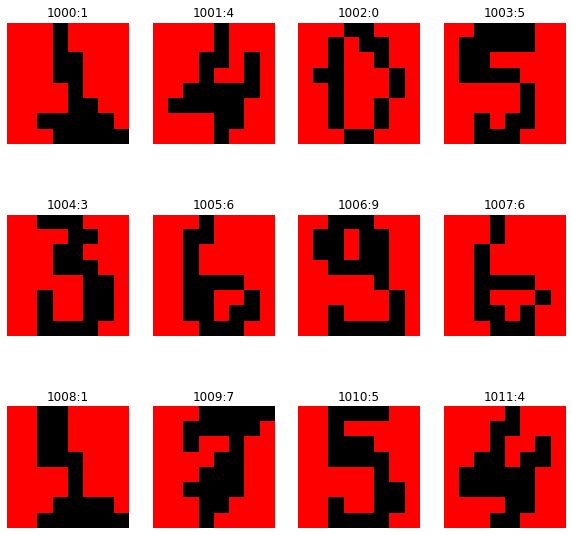

In [25]:
def plot_digits(start):    
    fig = plt.figure(figsize=(10,10))
    cmap = matplotlib.colors.ListedColormap(['red', 'black'])
    for im in range(12):
        plt.subplot(3,4,im+1)
        title = str(start+im) + ":" + str(data.target[start+im])
        plt.title(title)
        plt.imshow(data.images[start+im], cmap=cmap)     
        plt.axis('off')
    plt.show()
plot_digits(1000)

In [10]:
y = data.target
x = data.images.reshape((len(data.images), -1))
x.shape

(1797, 64)

In [11]:
x_train, y_train, x_test, y_test  = x[:1347], y[:1347], x[1347:], y[1347:]
 

In [12]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic',
                    solver='sgd', tol=0.01, n_iter_no_change=30, random_state=1, alpha=0.0001, learning_rate_init=.1, verbose=True)

In [13]:
mlp_classifier.fit(x_train,y_train)

Iteration 1, loss = 2.11541077
Iteration 2, loss = 1.57554613
Iteration 3, loss = 1.09801886
Iteration 4, loss = 0.73154274
Iteration 5, loss = 0.50055650
Iteration 6, loss = 0.35982359
Iteration 7, loss = 0.27664221
Iteration 8, loss = 0.22433407
Iteration 9, loss = 0.18744375
Iteration 10, loss = 0.16000843
Iteration 11, loss = 0.14162545
Iteration 12, loss = 0.12927647
Iteration 13, loss = 0.11615470
Iteration 14, loss = 0.10479092
Iteration 15, loss = 0.09712149
Iteration 16, loss = 0.09136116
Iteration 17, loss = 0.08460672
Iteration 18, loss = 0.07779865
Iteration 19, loss = 0.07367984
Iteration 20, loss = 0.06950367
Iteration 21, loss = 0.06492229
Iteration 22, loss = 0.06197923
Iteration 23, loss = 0.05831109
Iteration 24, loss = 0.05514949
Iteration 25, loss = 0.05270835
Iteration 26, loss = 0.05078068
Iteration 27, loss = 0.04873687
Iteration 28, loss = 0.04666945
Iteration 29, loss = 0.04455524
Iteration 30, loss = 0.04335551
Iteration 31, loss = 0.04077589
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,),
              learning_rate_init=0.1, n_iter_no_change=30, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

In [26]:
type(mlp_classifier)

sklearn.neural_network._multilayer_perceptron.MLPClassifier

In [14]:
predictions = mlp_classifier.predict(x_test)


In [15]:

accuracy_score(y_test, predictions)

0.9222222222222223

In [27]:
print(f"     y_test[10:20] = {y_test[10:20]}")
print(f"predictions[10:20] = {predictions[10:20]}")



     y_test[10:20] = [1 5 0 9 5 2 8 2 0 0]
predictions[10:20] = [1 5 0 9 6 2 8 2 0 0]
